In [1]:
import os
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
os.getcwd()

'/home/sanjeevan/files/Data Science/ml masters/Projects/Adult Census Income Prediction/adult-census-income-prediction/notebooks'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
!pip install imblearn
import imblearn
import category_encoders as ce

In [3]:
data_path=os.path.join("data_given","data.csv")
df=pd.read_csv("~/files/Data Science/ml masters/Projects/Adult Census Income Prediction/adult-census-income-prediction/data_given/data.csv")  


### Basic data overview

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
copy=df.copy()

In [7]:
copy['target']=copy.salary.map({" <=50K":0," >50K":1})

In [8]:
copy=copy.drop(labels='salary',axis=1)

### Categorical preprocessing

<AxesSubplot:>

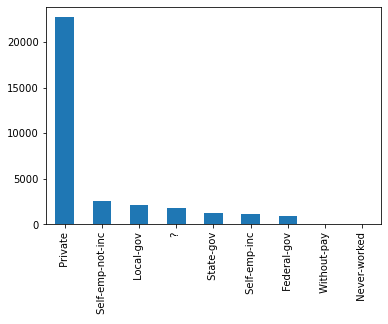

In [9]:
copy['workclass'].value_counts().plot(kind='bar')

In [10]:
len(copy.columns)

15

<AxesSubplot:>

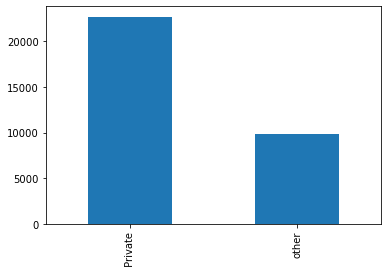

In [11]:
workclass_mapper = {
    ' State-gov': "other",
    ' Self-emp-not-inc': "other",
    ' Federal-gov': "other",
    ' Local-gov': "other",
    ' ?': "other",
    ' Self-emp-inc': "other",
    ' Without-pay': "other",
    ' Never-worked': "other"
}
copy["workclass"] = copy.workclass.map(workclass_mapper).fillna(copy["workclass"])
copy['workclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

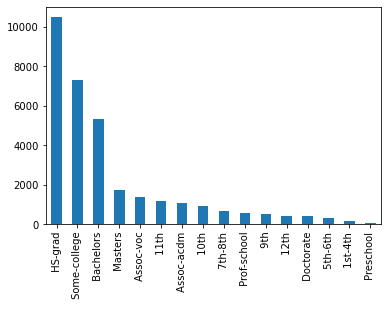

In [12]:
copy['education'].value_counts().plot(kind='bar')


<AxesSubplot:>

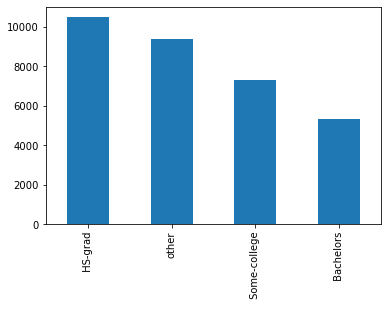

In [13]:
education_mapper ={' 11th': 'other',
         ' Masters': 'other',
         ' 9th': 'other',
         ' Assoc-acdm': 'other',
         ' Assoc-voc': 'other',
         ' 7th-8th': 'other',
         ' Doctorate': 'other',
         ' Prof-school': 'other',
         ' 5th-6th': 'other',
         ' 10th': 'other',
         ' 1st-4th': 'other',
         ' Preschool': 'other',
         ' 12th': 'other'}

copy['education'] = copy['education'].map(education_mapper).fillna(copy['education'])
copy['education'].value_counts().plot(kind='bar')

<AxesSubplot:>

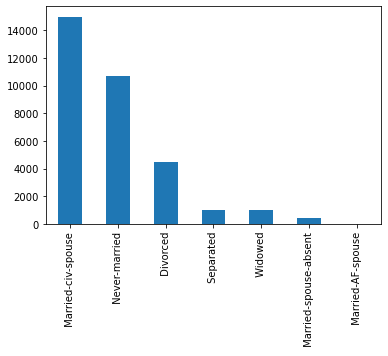

In [14]:
copy['marital-status'].value_counts().plot(kind='bar')

<AxesSubplot:>

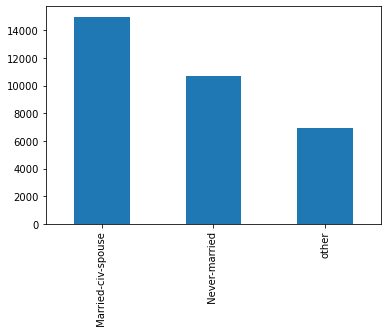

In [15]:
marital_status_mapper = {' Divorced': 'other',
 ' Married-spouse-absent': 'other',
 ' Separated': 'other',
 ' Married-AF-spouse': 'other',
 ' Widowed': 'other'}

copy['marital-status'] = copy['marital-status'].map(marital_status_mapper).fillna(copy['marital-status'])
copy['marital-status'].value_counts().plot(kind='bar')

<AxesSubplot:>

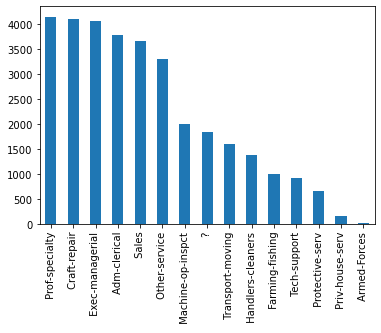

In [16]:
copy['occupation'].value_counts().plot(kind='bar')

<AxesSubplot:>

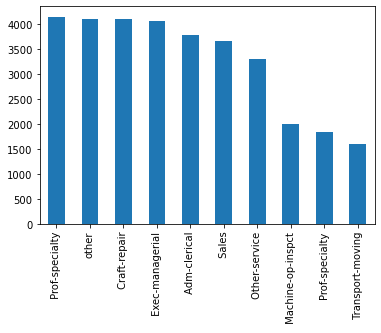

In [17]:
occupation_mapper = {
 ' ?': 'Prof-specialty',
 ' Protective-serv': 'other',
 ' Armed-Forces': 'other',
 ' Priv-house-serv': 'other',
 ' Tech-support': 'other',
 ' Farming-fishing': 'other',
 ' Handlers-cleaners': 'other'
 }

copy['occupation'] = copy['occupation'].map(occupation_mapper).fillna(copy["occupation"])
copy['occupation'].value_counts().plot(kind='bar')

In [18]:
copy.drop(columns=["fnlwgt"], axis=1, inplace=True)

### Find  Numerical correlation


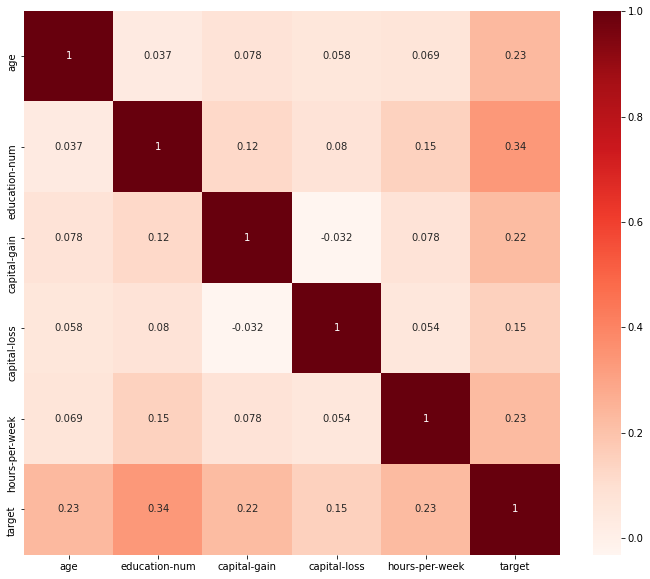

In [19]:
## Feature Correlation
plt.figure(figsize=(12,10))
cor = copy.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Start encoding and scaling

In [20]:
data_categorical=copy[['workclass','education','marital-status','occupation','relationship','race','sex','country']]
data_numerical=copy[['age','education-num','capital-gain','capital-loss','hours-per-week']]
target=copy['target']

In [21]:
data_categorical

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,other,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,other,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,other,other,Not-in-family,White,Male,United-States
3,Private,other,Married-civ-spouse,other,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,other,Married-civ-spouse,other,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,other,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [22]:
data_numerical

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


In [168]:
labeled_copy = data_categorical.apply(LabelEncoder().fit_transform)
labeled_copy.head()

,workclass,education,marital-status,occupation,relationship,race,sex,country
0,1,0,1,0,1,4,1,39
1,1,0,0,2,0,4,1,39
2,0,1,2,9,1,4,1,39
3,0,3,0,9,0,2,1,39
4,0,0,0,5,5,2,0,5


In [174]:
onehot=OneHotEncoder()
onehot_copy=onehot.fit_transform(data_categorical)
onehot_copy

<32561x74 sparse matrix of type '<class 'numpy.float64'>'
	with 260488 stored elements in Compressed Sparse Row format>

In [178]:
ordinal_copy=OrdinalEncoder().fit_transform(data_categorical)
ordinal_copy.shape

(32561, 8)

In [23]:
basen=ce.BaseNEncoder(base=4)
baseN_fit=basen.fit(data_categorical)
baseN_copy=baseN_fit.transform(data_categorical)

In [24]:
os.getcwd()

'/home/sanjeevan/files/Data Science/ml masters/Projects/Adult Census Income Prediction/adult-census-income-prediction/notebooks'

In [25]:
encoder= open("home/sanjeevan/files/Data Science/ml masters/Projects/Adult Census Income Prediction/adult-census-income-prediction/transformers/baseN_encoder.pkl",'rb')
base_n=pickle.load(encoder)
data_categorical=pd.DataFrame(base_n.transform(data_categorical))
encoder.close()

FileNotFoundError: [Errno 2] No such file or directory: 'home/sanjeevan/files/Data Science/ml masters/Projects/Adult Census Income Prediction/adult-census-income-prediction/transformers/baseN_encoder.pkl'

## Categorical  final selection below

In [38]:
a=['workclass_0', 'workclass_1', 'education_0', 'education_1',
       'marital-status_0', 'marital-status_1', 'occupation_0', 'occupation_1',
       'occupation_2', 'relationship_0', 'relationship_1', 'relationship_2',
       'race_0', 'race_1', 'race_2', 'sex_0', 'sex_1', 'country_0',
       'country_1', 'country_2', 'country_3',
'age','education-num','capital-gain','capital-loss','hours-per-week','Output']

In [39]:
len(a)

27

In [27]:
baseN_copy.columns

Index(['workclass_0', 'workclass_1', 'education_0', 'education_1',
       'marital-status_0', 'marital-status_1', 'occupation_0', 'occupation_1',
       'occupation_2', 'relationship_0', 'relationship_1', 'relationship_2',
       'race_0', 'race_1', 'race_2', 'sex_0', 'sex_1', 'country_0',
       'country_1', 'country_2', 'country_3'],
      dtype='object')

In [ ]:
base

In [209]:
import pickle
outfile= open("baseN_encoder.pkl",'wb')
pickle.dump(baseN_fit,outfile)
outfile.close()
#with open(os.path.join("basen_encoder_weights","baseN_fit.json"),'w') as f:
#    pickle.dump(baseN_fit.to_dict(), f,indent=2)

## Numerical final selection below
### 1) capital gains and losses is sparse-bad columns
### 2) best transformations age-log,education-boxcox,hours/week-boxcox

In [28]:
data_numerical

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
32556,27,12,0,0,38
32557,40,9,0,0,40
32558,58,9,0,0,40
32559,22,9,0,0,20


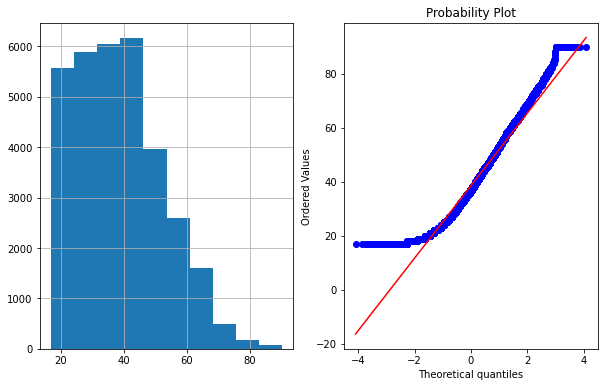

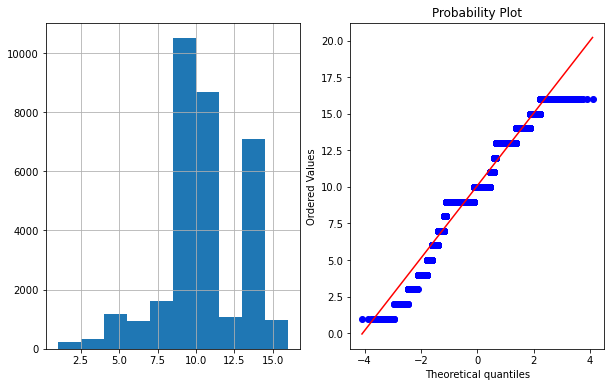

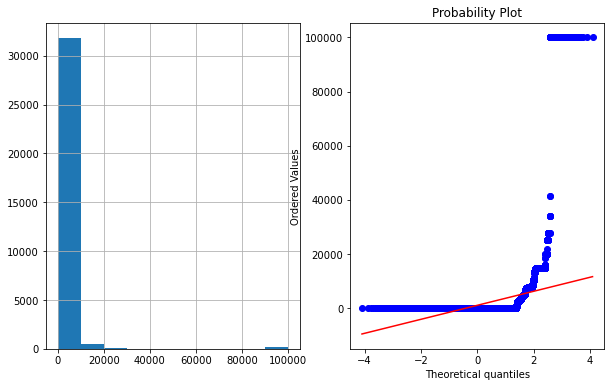

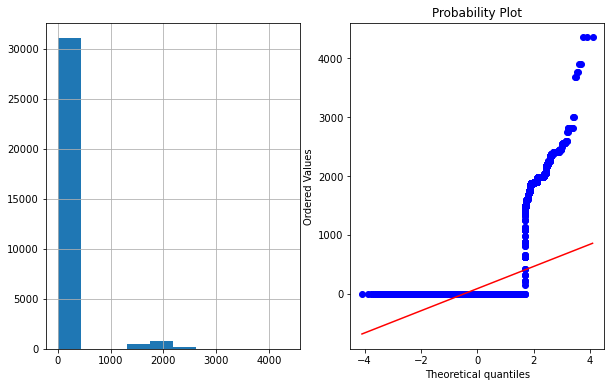

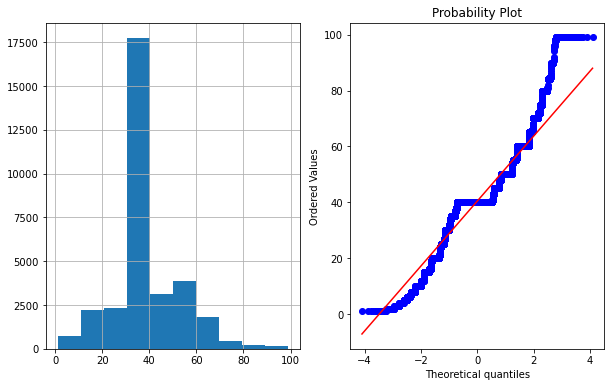

In [29]:
import scipy.stats as stat
from matplotlib import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
for col_name in range(len(data_numerical.columns)):
    plot_data(data_numerical,data_numerical.columns[col_name])

In [31]:
import numpy as np
data_numerical['age']=np.log(data_numerical['age'])
data_numerical['education-num'],_=stat.boxcox(data_numerical['education-num'])
data_numerical['hours-per-week'],_=stat.boxcox(data_numerical['hours-per-week'])

<ipython-input-31-79438dff790b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical['age']=np.log(data_numerical['age'])
<ipython-input-31-79438dff790b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numerical['education-num'],_=stat.boxcox(data_numerical['education-num'])
<ipython-input-31-79438dff790b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [32]:
sc=StandardScaler()
sc_fit=sc.fit(data_numerical)

In [33]:
print("standard scaler means=",sc_fit.mean_)
print('standard scaler variances=',sc_fit.var_)

standard scaler means= [   3.5893596    15.21707704 1077.64884371   87.30382973   39.60637315]
standard scaler variances= [1.29868817e-01 2.66541456e+01 5.45408641e+07 1.62371951e+05
 1.54128346e+02]


In [34]:
data_numerical=sc_fit.transform(data_numerical)

In [35]:
data_numerical=pd.DataFrame(data_numerical)
#baseN_copy.head()
data_numerical.head()

,0,1,2,3,4
0,0.205903,1.16500,0.148453,-0.21666,-0.035681
1,0.895359,1.16500,-0.145920,-0.21666,-2.221073
2,0.133824,-0.46402,-0.145920,-0.21666,-0.035681
3,1.057050,-1.20233,-0.145920,-0.21666,-0.035681
4,-0.713580,1.16500,-0.145920,-0.21666,-0.035681


In [332]:
outfile= open("standard_scaler.pkl",'wb')
pickle.dump(sc_fit,outfile)
outfile.close()


### Combine categorical and numerical values

In [314]:
data_cat=np.array(baseN_copy)
data_num=np.array(data_numerical)

In [317]:
y=np.array(target)

In [319]:
y=y.reshape(32561,1)

In [325]:
clean_data=np.c_[data_num,data_cat,target]

In [326]:
df=pd.DataFrame(clean_data)

In [351]:
for i in range(5,28):
    df[i]=df[i].apply(lambda x: int(x))
    

In [384]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.205903,1.16500,0.148453,-0.21666,-0.035681,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,0.895359,1.16500,-0.145920,-0.21666,-2.221073,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,0.133824,-0.46402,-0.145920,-0.21666,-0.035681,0,2,0,2,0,...,0,1,0,1,0,0,0,1,0,0
3,1.057050,-1.20233,-0.145920,-0.21666,-0.035681,0,2,0,3,0,...,0,2,0,1,0,0,0,1,0,0
4,-0.713580,1.16500,-0.145920,-0.21666,-0.035681,0,2,0,1,0,...,0,2,0,2,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.814497,0.74078,-0.145920,-0.21666,-0.197667,0,2,0,3,0,...,0,1,0,2,0,0,0,1,0,0
32557,0.276158,-0.46402,-0.145920,-0.21666,-0.035681,0,2,0,2,0,...,0,1,0,1,0,0,0,1,1,1
32558,1.307210,-0.46402,-0.145920,-0.21666,-0.035681,0,2,0,2,0,...,0,1,0,2,0,0,0,1,0,0
32559,-1.382781,-0.46402,-0.145920,-0.21666,-1.654859,0,2,0,2,0,...,0,1,0,1,0,0,0,1,0,0
